# ELM experiments

In [ ]:
import sys
import os

import pandas as pd
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

from models.elm import ELM
from evaluator.model_evaluator import ModelEvaluator


In [2]:
X_train = pd.read_csv('../dataset/X_train.csv').values
X_test = pd.read_csv('../dataset/X_test.csv').values
y_train = pd.read_csv('../dataset/y_train.csv').values.ravel()
y_test = pd.read_csv('../dataset/y_test.csv').values.ravel()

X_train_smote = pd.read_csv('../dataset/smote_resample/X_train.csv').values
y_train_smote = pd.read_csv('../dataset/smote_resample/y_train.csv').values.ravel()

X_train_tomek = pd.read_csv('../dataset/tomek_resample/X_train.csv').values
y_train_tomek = pd.read_csv('../dataset/tomek_resample/y_train.csv').values.ravel()



In [3]:

elm = ELM(hidden_nodes=1000,activation='sigmoid',random_state=42)
elm.fit(X_train, y_train)
y_pred= elm.predict(X_test)
metrics = ModelEvaluator.calculate_metrics(y_test, y_pred)
print(metrics)

{'accuracy': np.float64(0.7883522727272727), 'precision': np.float64(0.6141975308641975), 'recall': np.float64(0.5349462365591398), 'f1_score': np.float64(0.57183908045977), 'f2_score': np.float64(0.5491169977924945)}


In [ ]:
hidden_node_values = range(0, 700, 50)
activations = ['relu', 'sigmoid', 'tanh']
f2_scores = {act: [] for act in activations}

for activation in activations:
    print(f"\n--- Activation: {activation} ---")
    for n_nodes in hidden_node_values:
        elm = ELM(hidden_nodes = n_nodes, activation= activation, random_state= 42)
        elm.fit(X_train, y_train)
        y_pred = elm.predict(X_test)  

        metrics = ModelEvaluator.calculate_metrics(y_test, y_pred)
        
        f2_scores[activation].append(metrics['f2_score'])
        print(f"Hidden Nodes: {n_nodes}, F2-score: {metrics['f2_score']}")



--- Activation: relu ---
Hidden Nodes: 0, F2-score: 0
Hidden Nodes: 50, F2-score: 0.5701509223029625
Hidden Nodes: 100, F2-score: 0.5555555555555555
Hidden Nodes: 150, F2-score: 0.558361391694725
Hidden Nodes: 200, F2-score: 0.5754189944134078
Hidden Nodes: 250, F2-score: 0.5679910464465584
Hidden Nodes: 300, F2-score: 0.588888888888889
Hidden Nodes: 350, F2-score: 0.5762806236080178
Hidden Nodes: 400, F2-score: 0.5843071786310519
Hidden Nodes: 450, F2-score: 0.5759599332220366
Hidden Nodes: 500, F2-score: 0.574361820199778
Hidden Nodes: 550, F2-score: 0.5691282620766241
Hidden Nodes: 600, F2-score: 0.5706371191135734
Hidden Nodes: 650, F2-score: 0.5598885793871865

--- Activation: sigmoid ---
Hidden Nodes: 0, F2-score: 0
Hidden Nodes: 50, F2-score: 0.5371203599550056
Hidden Nodes: 100, F2-score: 0.5595970900951315
Hidden Nodes: 150, F2-score: 0.5735870173475098
Hidden Nodes: 200, F2-score: 0.5713489409141582
Hidden Nodes: 250, F2-score: 0.5902004454342985
Hidden Nodes: 300, F2-score:

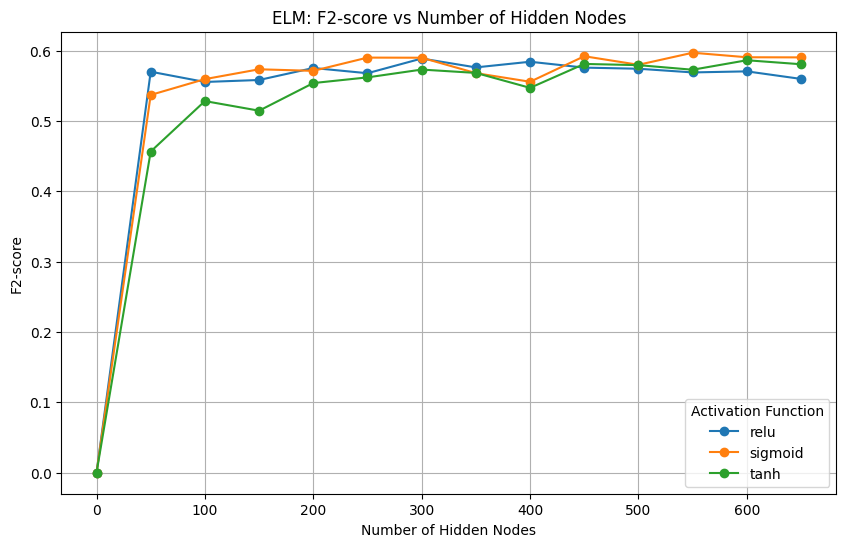

In [63]:
# Plotting
plt.figure(figsize=(10, 6))
for activation in activations:
    plt.plot(hidden_node_values, f2_scores[activation], marker='o', label=activation)

plt.xlabel('Number of Hidden Nodes')
plt.ylabel('F2-score')
plt.title('ELM: F2-score vs Number of Hidden Nodes')
plt.legend(title='Activation Function')
plt.grid(True)
plt.show()

### for gui integration i should use:
hidden_nodes = {
    relu: 300,
    sigmoid: 400,
    tan': 300
}
